# Random Sampling Imputation

In this we will select random values from the dataset to fill the NAN values. 

We will be using this technique in case of MCAR( Missing Completely at Random).

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [87]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [88]:
a=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=42)
a.index

Int64Index([149, 407,  53, 369, 818, 549,  85, 774, 100, 816,
            ...
            569, 291,  80, 487, 546,  38, 247, 445, 323, 714],
           dtype='int64', length=177)

What we are trying to do here replace all the 177 null values in Age column with random sample values.
We are using sample(df['Age'].isnull().sum(),random_state=42) because we want to replace all the 177 values not one value.

In [89]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [91]:
def impute_nan(df,feature,median):
    #Fill the column with median
    df[feature+'_median']=df[feature].fillna(median)
    #Now the feature_random contains all the feature values+ NAN values
    df[feature+'_random']=df[feature]
    #We replace all the NAN values with Sample values and assing it to the new variable
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    #If we want to merge the new variable into df then both the index should be same.
    random_sample.index=df[df[feature].isnull()].index
    #We have applied the condition for the rows in the given column to replace NAN values in feature+'_random' with random_sample
    df.loc[df[feature].isnull(),feature+'_random']=random_sample

In [92]:
impute_nan(df,'Age',df['Age'].median())

In [93]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


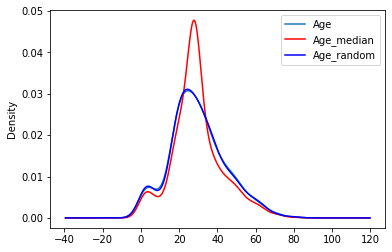

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

###### Random Sample Imputation is better than Mean/Median Imputation because there is less distortion in variance  and it is easy to implement as well

### --------------------------------------------------------------------------------------------------------------------------------------------------

#### Computing Nan Values with new feature

In [97]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [98]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [99]:
df['Age'+'_nan']=np.where(df['Age'].isnull(),1,0)

In [101]:
df.head(20)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


###### This method is all easy to implement but it suffers the  CURSE OF DIMENTIONALITY beacuse of additional features.

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### End Of Distribution Imputation

In [102]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [103]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

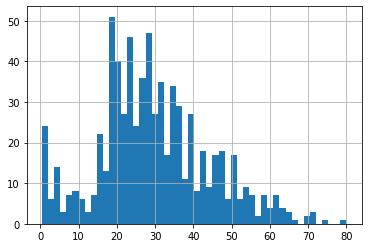

In [107]:
df['Age'].hist(bins=50)

We can see the Outliers clearly so we will use the 3*S.D from Normal Distribution Theory to define the outliers

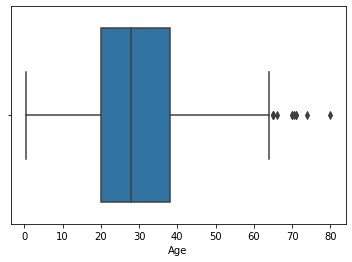

In [110]:
sns.boxplot(df['Age'])

In [113]:
df['Age'].mean()

29.69911764705882

In [115]:
extreme=df['Age'].mean()+3.0*df['Age'].std()
extreme

73.27860964406095

In [125]:
def impute_nan(df,feature,median,extreme):
    df[feature+'_median']=df[feature].fillna(median)
    #Where ever we are getting Nan values in the Feature column will be replaced with the Extreme Value.
    df[feature+'_extreme_distribution']=df[feature].fillna(extreme)

In [126]:
impute_nan(df,'Age',df['Age'].median(),extreme)

In [127]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_extreme_distribution
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
5,0,NaN,8.4583,28.0,73.27861
6,0,54.0,51.8625,54.0,54.00000
7,0,2.0,21.0750,2.0,2.00000
8,1,27.0,11.1333,27.0,27.00000
9,1,14.0,30.0708,14.0,14.00000


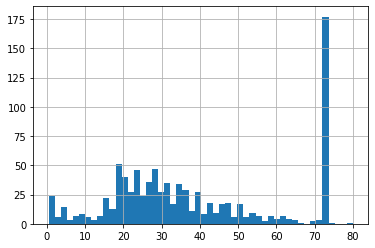

In [129]:
df['Age_extreme_distribution'].hist(bins=50)

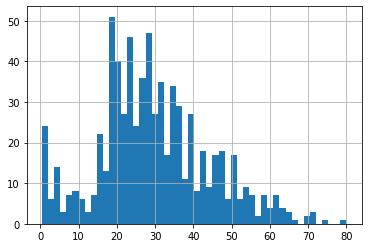

In [130]:
df['Age'].hist(bins=50)

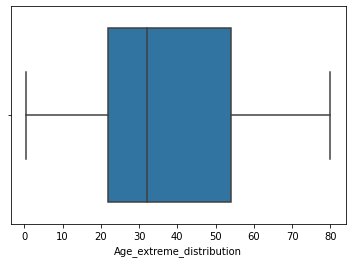

In [133]:
sns.boxplot('Age_extreme_distribution',data=df)